In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix


In [2]:
df = pd.read_csv('dataset_new.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [4]:
df.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [5]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [6]:
df.drop(columns=['Unnamed: 0','id'], axis=1, inplace=True)

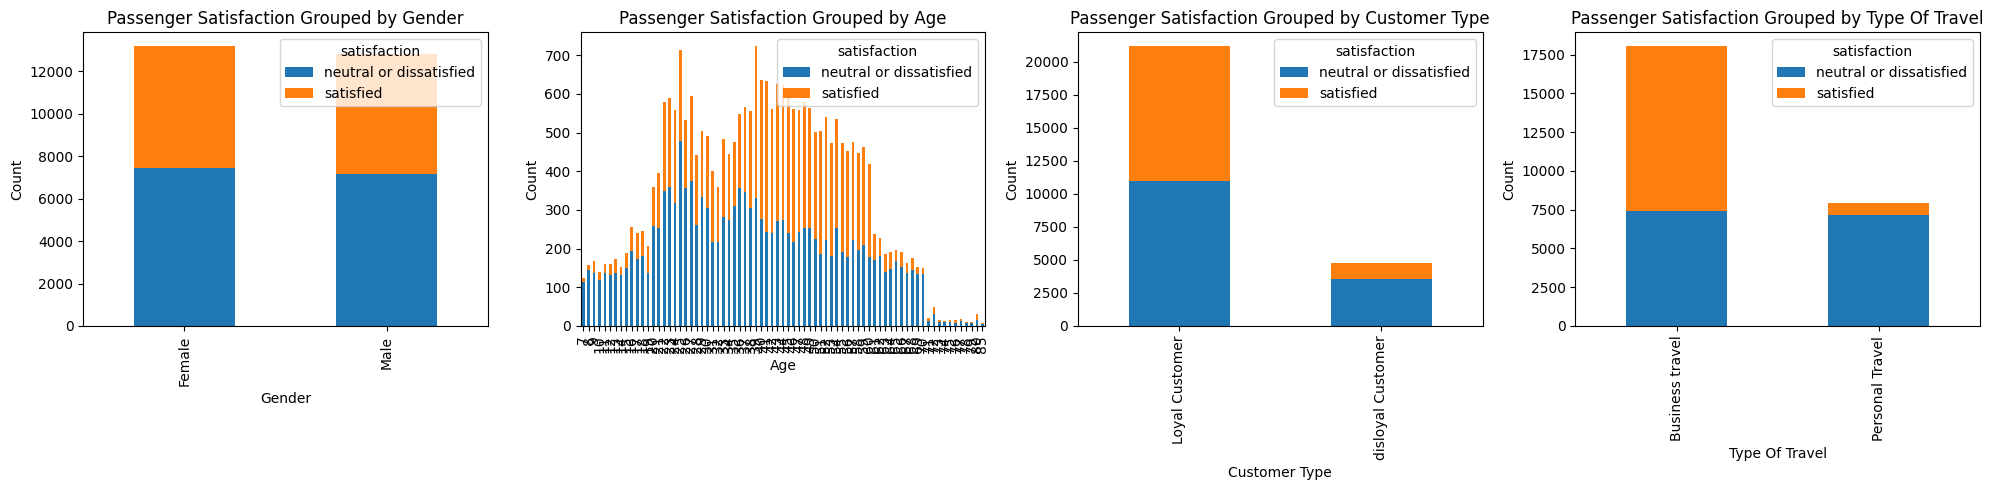

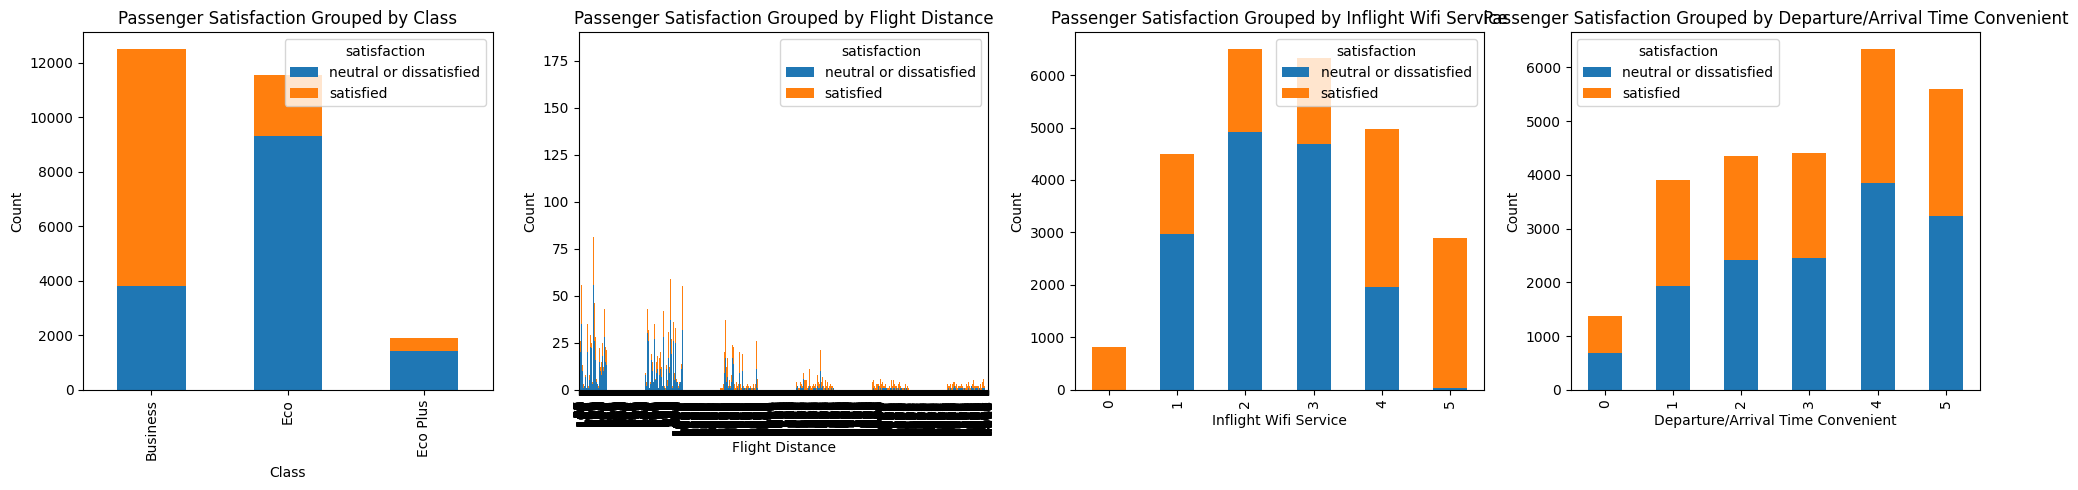

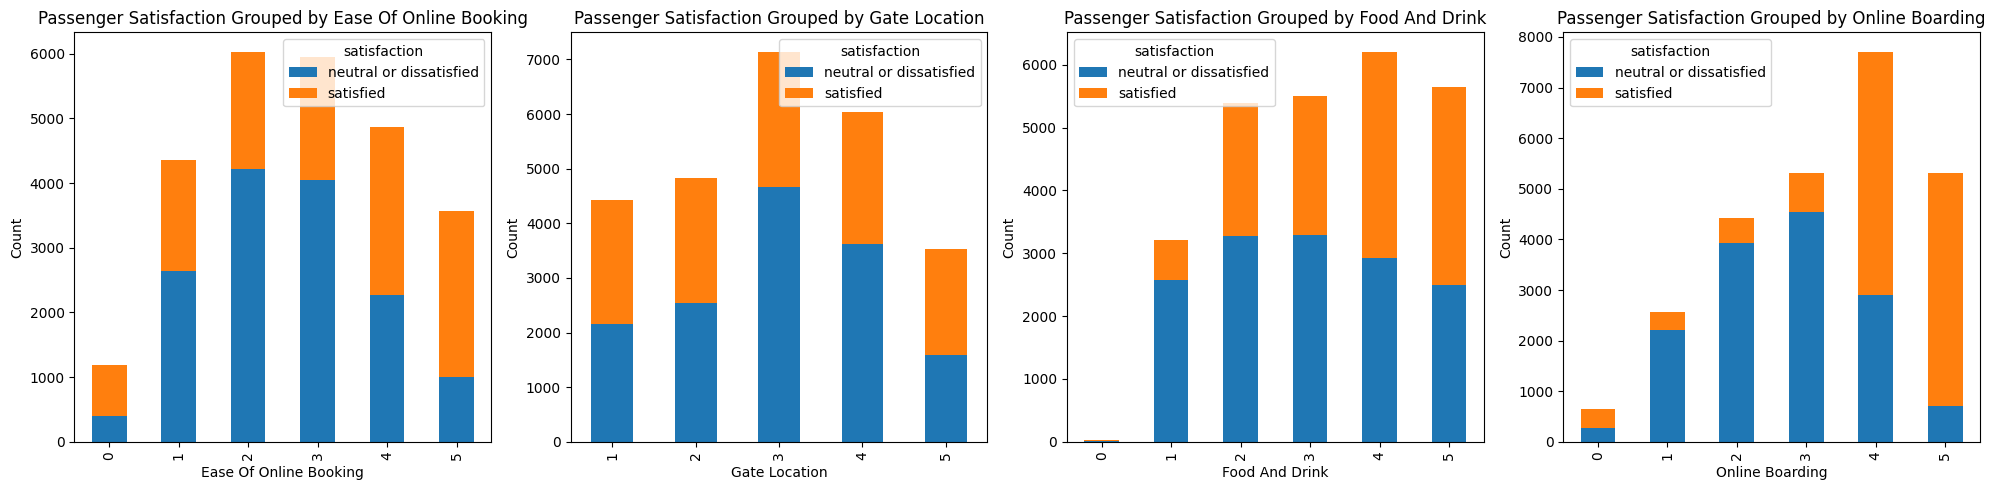

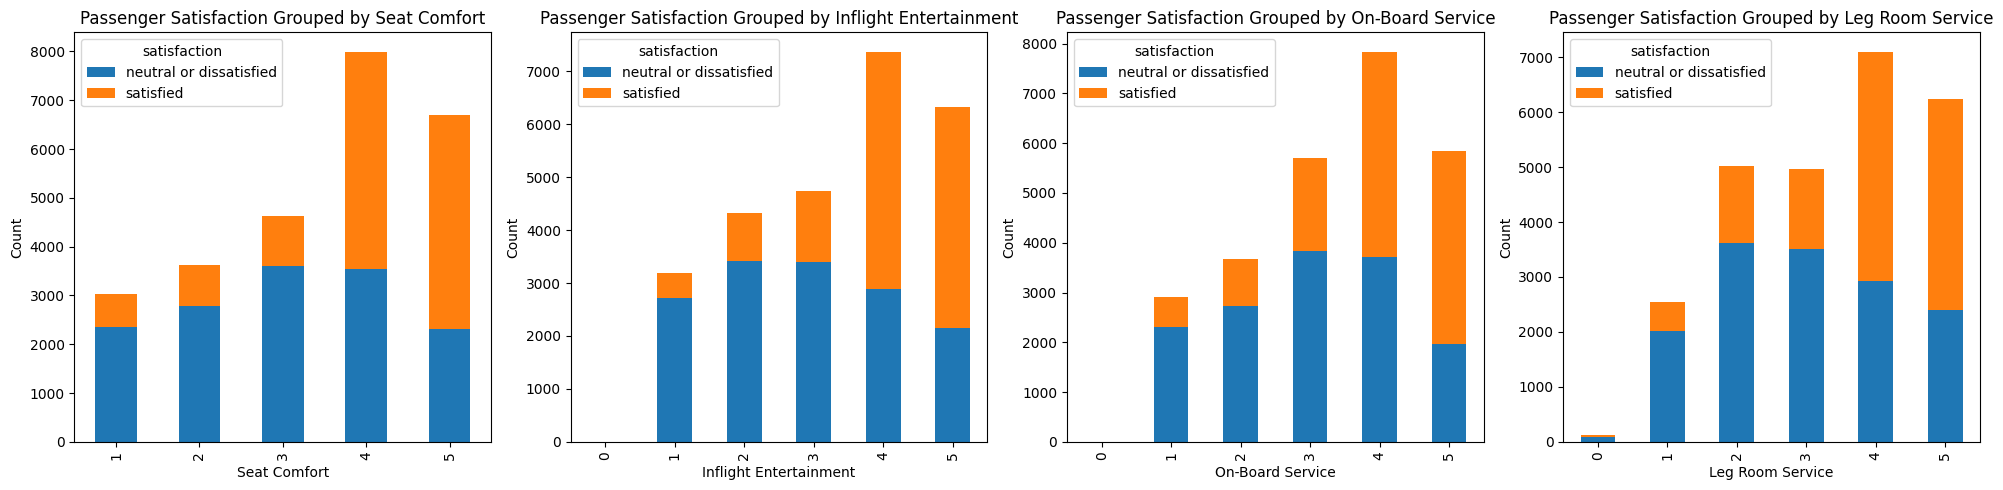

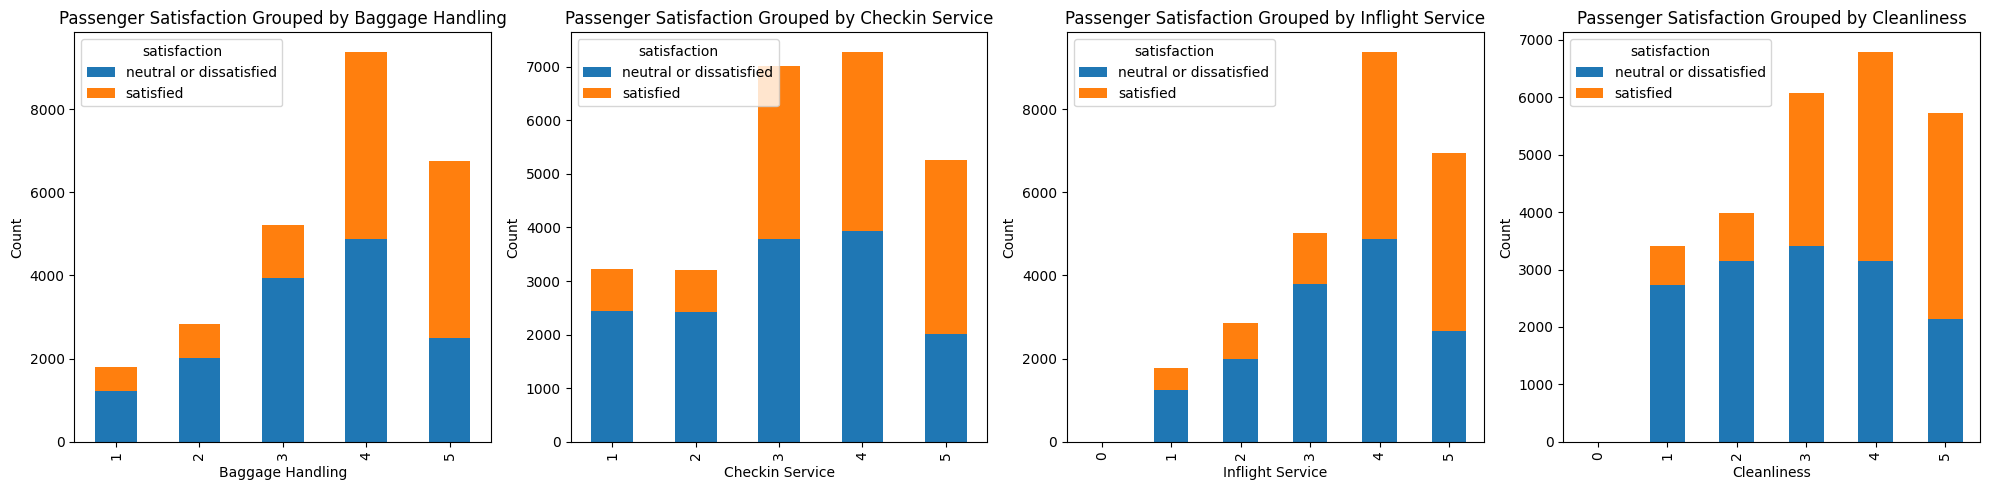

In [7]:
def plot_grouped_data(df, group_by_cols, target_col='satisfaction', kind='bar', stacked=True):
    num_plots = len(group_by_cols)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))
    
    if num_plots == 1:
        axes = [axes]
    
    for ax, group_by_col in zip(axes, group_by_cols):
        grouped = df.groupby([group_by_col, target_col]).size().unstack()
        grouped.plot(kind=kind, stacked=stacked, ax=ax)
        ax.set_xlabel(group_by_col.replace('_', ' ').title())
        ax.set_ylabel('Count')
        ax.set_title(f'Passenger Satisfaction Grouped by {group_by_col.replace("_", " ").title()}')

    plt.tight_layout()
    plt.show()

group_by_columns1 = ['Gender', 'Age', 'Customer Type', 'Type of Travel']
group_by_columns2 = ['Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient']
group_by_columns3 = ['Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding']
group_by_columns4 = ['Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service']
group_by_columns5 = ['Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
plot_grouped_data(df, group_by_columns1)
plot_grouped_data(df, group_by_columns2)
plot_grouped_data(df, group_by_columns3)
plot_grouped_data(df, group_by_columns4)
plot_grouped_data(df, group_by_columns5)

In [8]:
lb = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = lb.fit_transform(df[col])

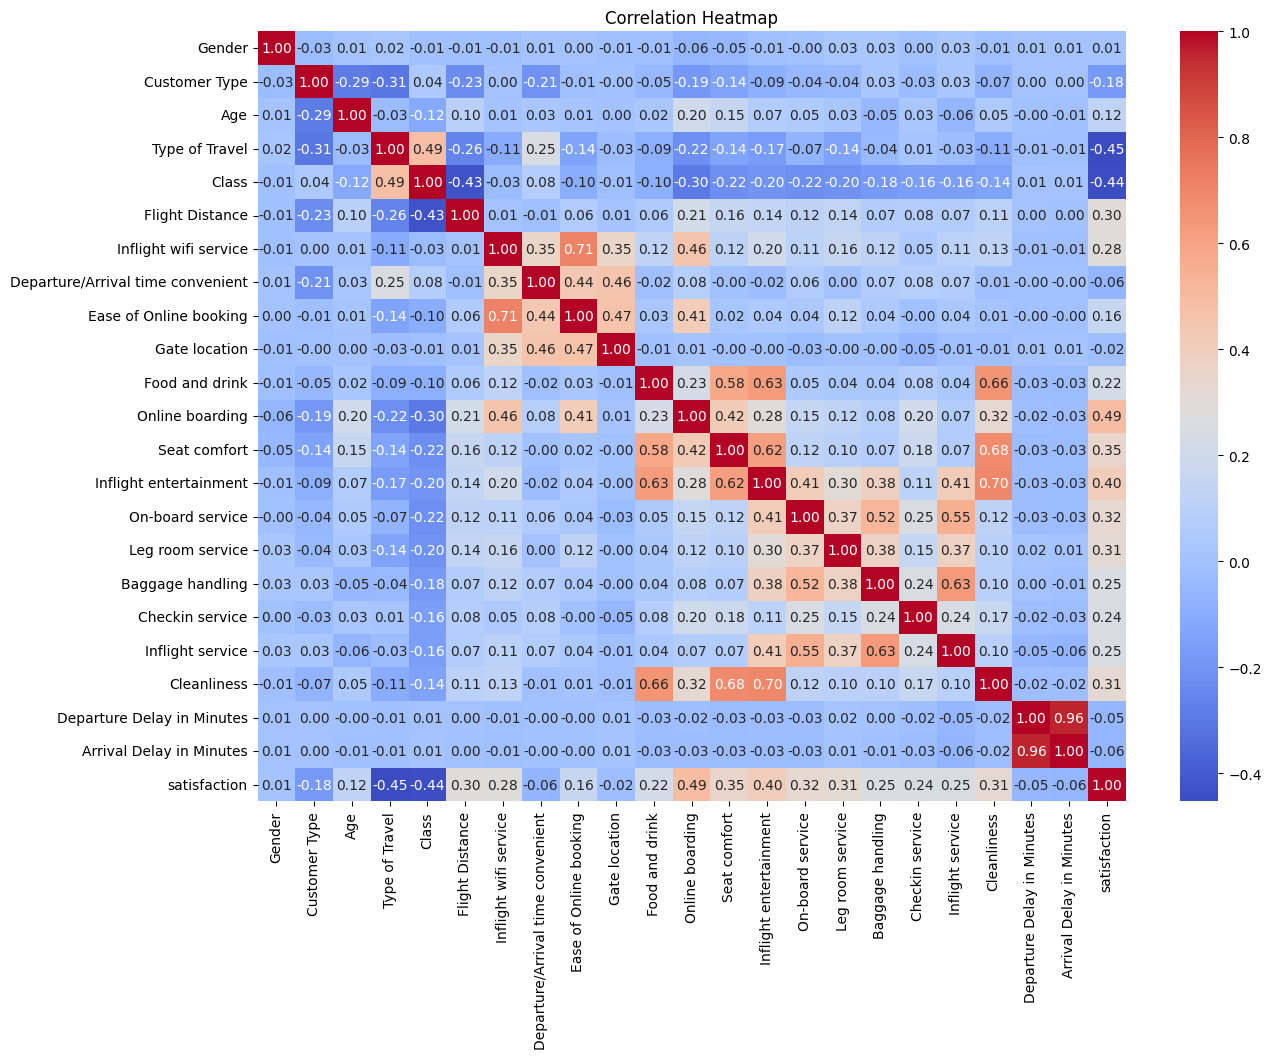

In [9]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
sc = StandardScaler()
X = df.drop(['satisfaction'], axis=1)
y = df['satisfaction']

X = sc.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
modelKNC = KNeighborsClassifier()
modelSVC = SVC()
modelNB = GaussianNB()
modelRFC = RandomForestClassifier()

modelKNC.fit(X_train, y_train)
modelSVC.fit(X_train, y_train)
modelNB.fit(X_train, y_train)
modelRFC.fit(X_train, y_train)

RandomForestClassifier()

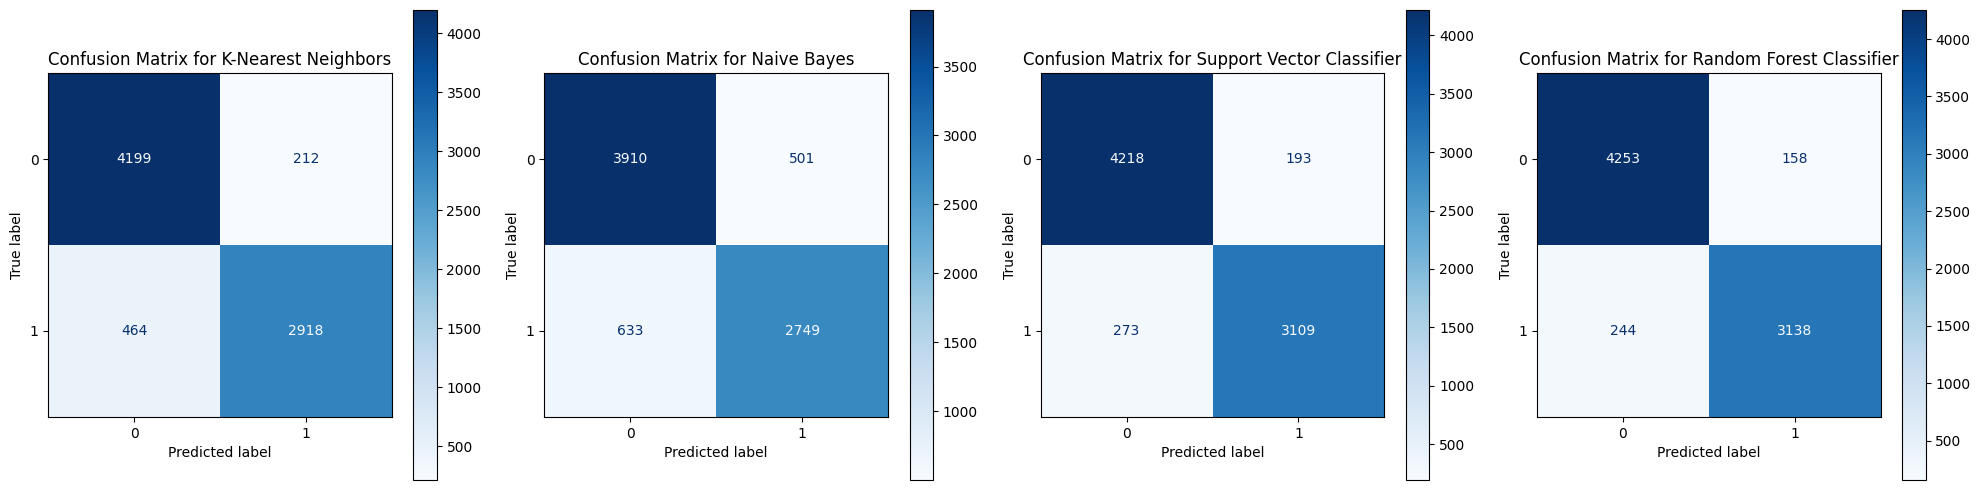

In [13]:
def plot_confusion_matrices(models, X_test, y_test):
    num_models = len(models)
    fig, axes = plt.subplots(1, num_models, figsize=(5 * num_models, 5))
    
    if num_models == 1:
        axes = [axes]
    
    for ax, (model, name) in zip(axes, models):
        cm = confusion_matrix(y_test, model.predict(X_test))
        disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
        disp.plot(ax=ax, cmap=plt.cm.Blues)
        ax.set_title(f'Confusion Matrix for {name}')
    
    plt.tight_layout()
    plt.show()

models = [
    (modelKNC, "K-Nearest Neighbors"),
    (modelNB, "Naive Bayes"),
    (modelSVC, "Support Vector Classifier"),
    (modelRFC, "Random Forest Classifier")
]

plot_confusion_matrices(models, X_test, y_test)

In [14]:
print("K-Nearest Neighbor :", accuracy_score(y_test,modelKNC.predict(X_test)))
print(classification_report(y_test,modelKNC.predict(X_test)))

print("Naive Bayes :", accuracy_score(y_test,modelNB.predict(X_test)))
print(classification_report(y_test,modelNB.predict(X_test)))

print("SVC :", accuracy_score(y_test,modelSVC.predict(X_test)))
print(classification_report(y_test,modelSVC.predict(X_test)))

print("Random Forest :", accuracy_score(y_test,modelRFC.predict(X_test)))
print(classification_report(y_test,modelRFC.predict(X_test)))

K-Nearest Neighbor : 0.913255485692288
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      4411
           1       0.93      0.86      0.90      3382

    accuracy                           0.91      7793
   macro avg       0.92      0.91      0.91      7793
weighted avg       0.91      0.91      0.91      7793

Naive Bayes : 0.8544847940459387
              precision    recall  f1-score   support

           0       0.86      0.89      0.87      4411
           1       0.85      0.81      0.83      3382

    accuracy                           0.85      7793
   macro avg       0.85      0.85      0.85      7793
weighted avg       0.85      0.85      0.85      7793

SVC : 0.9402027460541511
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4411
           1       0.94      0.92      0.93      3382

    accuracy                           0.94      7793
   macro avg       0.94      0.

In [15]:
# Check Training Score
print(modelKNC.score(X_train, y_train))
print(modelSVC.score(X_train, y_train))
print(modelNB.score(X_train, y_train))
print(modelRFC.score(X_train, y_train)) # Overfitting


0.9425287356321839
0.9568828026178299
0.8615739976901502
1.0


C:\Users\Rave\AppData\Local\Temp\ipykernel_6412\3328279615.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score, y=model, palette='viridis')


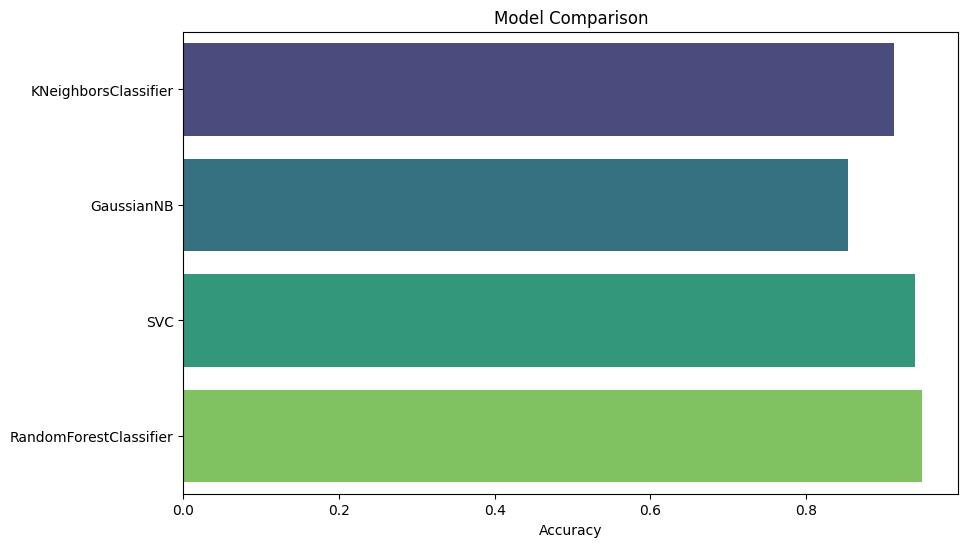

In [16]:
knn = accuracy_score(y_test,modelKNC.predict(X_test))
nb = accuracy_score(y_test,modelNB.predict(X_test))
svc = accuracy_score(y_test,modelSVC.predict(X_test))
rfc = accuracy_score(y_test,modelRFC.predict(X_test))

model = ['KNeighborsClassifier', 'GaussianNB', 'SVC', 'RandomForestClassifier']

score = [knn, nb, svc, rfc]

plt.figure(figsize=(10, 6))
sns.barplot(x=score, y=model, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Accuracy')
plt.show()